<a href="https://colab.research.google.com/github/Jaybhatt216/EIT/blob/main/cosine_Similarity_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture

UsageError: %%capture is a cell magic, but the cell body is empty.


In [14]:
from absl import logging
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns



Tensor flow hub encoder = 'https://tfhub.dev/google/universal-sentence-encoder/4'

In [18]:
module_url = 'https://tfhub.dev/google/universal-sentence-encoder/4'

In [19]:
model = hub.load(module_url)


In [36]:
from numpy.linalg import norm

In [37]:
def cos_sim(a,b):
  return np.inner(a,b)/(norm(a)*norm(b))

In [20]:
def embed(input):
  return model(input)

In [26]:
word = "elephant"

sentence = "This is my sentnce there are many like it but this is mine"

paragrpah = ("The Universal Sentence Encoder encodes text into high-dimensional "
"vectors that can be used for text classification, semantic similarity, "
"clustering and other natural language tasks."
"The model is trained and optimized for greater-than-word "
"length text, such as sentences, phrases or short paragraphs. ")

messages = [word,sentence,paragrpah]
message_embeddings = embed(messages)

for i,  message_embedding in enumerate(np.array(message_embeddings).tolist()):
  print("message: {}".format(messages[i]))
  print("Embedding size: {}".format(len(message_embeddings)))
  message_embeddings_snippet = ",".join((str(x) for x in message_embeddings[:3]))

  print("embedding: [{},....]\n".format(message_embeddings_snippet))



message: elephant
Embedding size: 3
embedding: [tf.Tensor(
[ 8.34448636e-03  4.80858260e-04  6.59524873e-02 -1.97126381e-02
  3.57008204e-02  3.65892723e-02  3.70612480e-02 -1.12045957e-02
 -3.17390147e-03  4.21421863e-02  7.64983818e-02  7.04208985e-02
 -1.62738767e-02 -2.85077491e-03 -3.38685960e-02 -5.61367981e-02
 -3.20003107e-02  3.03571578e-02 -7.99226835e-02 -5.48588149e-02
  2.84989085e-02  3.66121270e-02  5.85439205e-02  1.70133188e-02
 -5.32833152e-02  3.42066586e-02 -3.17065977e-02 -6.32714331e-02
  1.71268359e-02 -3.16850692e-02 -2.44463701e-02 -7.80240297e-02
  4.53712866e-02 -2.56830249e-02 -7.20223710e-02  3.57165821e-02
 -4.69715297e-02  7.40225986e-02  7.19123054e-03  7.71081168e-03
  3.19260396e-02  1.70774478e-02 -2.34687719e-02 -3.52300480e-02
 -8.00299868e-02  3.54695171e-02 -3.86509262e-02  8.14681966e-03
 -1.60236768e-02  4.43639122e-02  7.98752159e-02 -1.94659922e-02
  7.43112937e-02  5.95273189e-02 -3.31027224e-03 -5.19298948e-03
  4.56661247e-02 -6.02185773e-0

## cosine similarity task

In [83]:
def plot_similarity(labels,features,rotation):
  corr = np.inner(features,features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels = labels,
      yticklabels = labels,
      vmin = 0,
      vmax = 1,
      cmap="YlOrRd"
  )
  g.set_xticklabels(labels,rotation=rotation)
  g.set_title("Semantic Textual Similarity")


def plot_cos_similarity(labels,features,rotation):
  corr = cos_sim(features,features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels = labels,
      yticklabels = labels,
      vmin = 0,
      vmax = 1,
      cmap="YlOrRd"
  )
  g.set_xticklabels(labels,rotation=rotation)
  g.set_title("Semantic Textual Similarity")  



def run_and_plot(messages_):
  message_embeddings_ = embed(messages_)
  plot_similarity(messages_,message_embeddings_,90)



def run_and_plot_cos(messages_):
  message_embeddings_ = embed(messages_)
  plot_cos_similarity(messages_,message_embeddings_,90)


In [84]:
messages = [
            #Cars 
            "This is a fast car",
            "That car is shiny",
            "My toyota is expensive",



            #Computers
            "I wish I had a faster video card ",
            "My QWERTY keyboard is faulty",
            "I have a fast Graphics card",
            "I have a slow gtx card",


            #Weather
            "There is a cold front coming",
            "Winter is here!",
            "I wish it would snow",
            "Did the groundhog see its shadow",


            #MISC
            "Buffalo Buffalo Buffalo Buffalo....",
            "May the Farce be with you",
            "I'm a Mog",
            "I'm my own best friend"





]

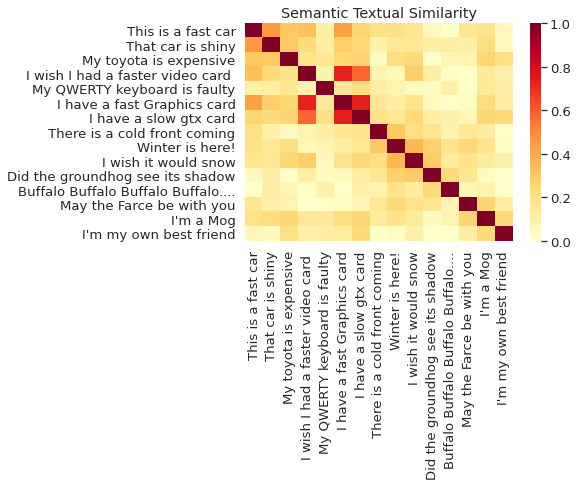

In [85]:
run_and_plot(messages)

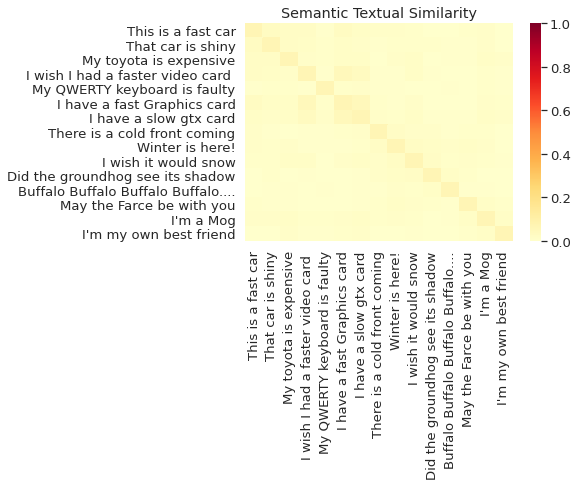

In [86]:
run_and_plot_cos(messages)